## Student ID
>> `Zeynab Mottaqi`

>> `99206203
`

In [ ]:
'''

Packages

'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torchvision.transforms import ToTensor
from torchmetrics import Accuracy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from PIL import Image,ImageOps

In [ ]:
Data = pd.read_csv('Q3_train.csv')

Targets  = Data['label'].values
Images = Data.drop('label',axis=1).values


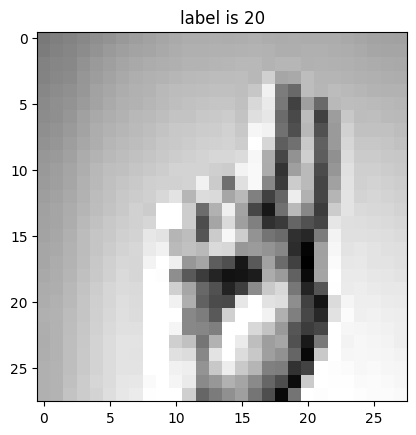

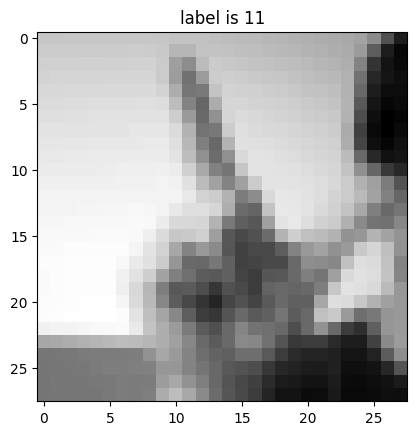

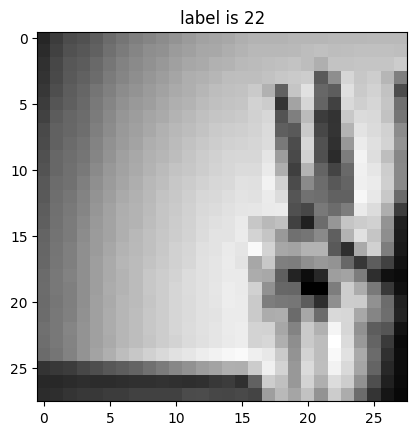

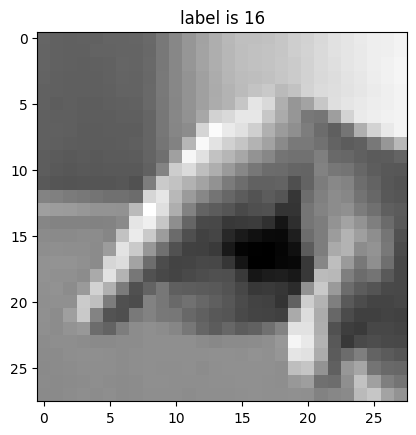

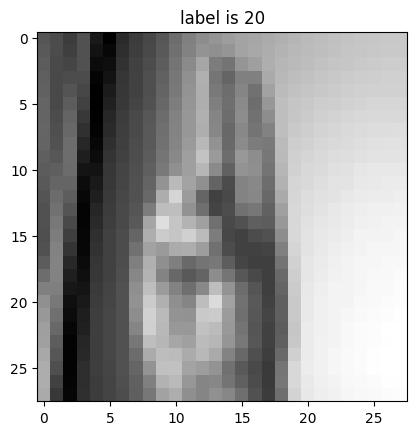

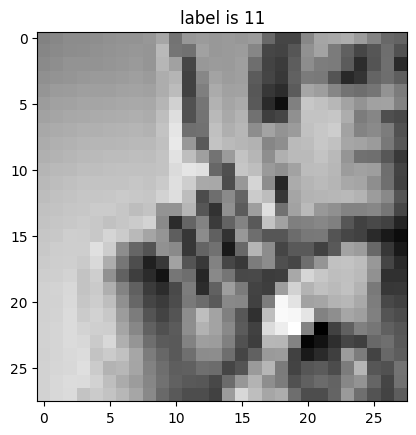

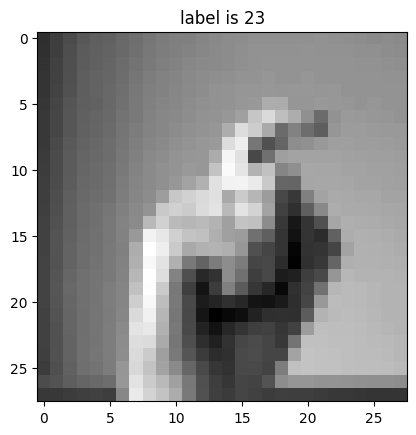

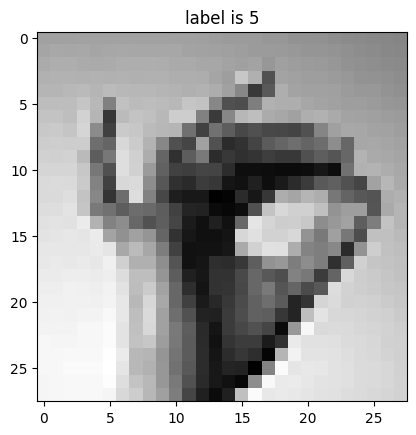

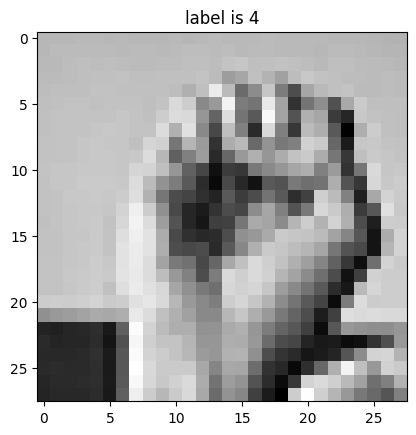

In [ ]:
np.random.seed(100)
index = np.random.randint(0,len(Images),9)

for t in index:
    plt.imshow(Images[t,:].reshape(28,28),cmap='gray')
    plt.title("label is %s" %Targets[t]) 
    plt.show()

In [ ]:
def Data_to_Categorical(x, categs=None):
    if not categs:
        categs = np.amax(x) + 1
    
    Encodes = np.zeros((x.shape[0],categs))
    Encodes[np.arange(x.shape[0]),x] = 1
    return Encodes 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Images,Targets,test_size=0.3)

def to_Tensor(x):
    return torch.Tensor(x)

y_train , y_test = Data_to_Categorical(y_train), Data_to_Categorical(y_test)

X_train, X_test, y_train, y_test = to_Tensor(X_train), to_Tensor(X_test), to_Tensor(y_train),to_Tensor(y_test)


In [ ]:
D_In,D_Hid,D_Out = 28*28,50,25
learning_rate = 1e-4
Epochs = 500
Model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=D_In,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Out),
    nn.Softmax()
)

criter = nn.CrossEntropyLoss()
Optimizer = torch.optim.SGD(Model.parameters(),lr=learning_rate)
for epoch in range(Epochs):
    Optimizer.zero_grad()

    Pred = Model.forward(X_train)
    Loss = criter(Pred,nn.Softmax(dim=1)(y_train))
    accuracy = np.sum(Pred.argmax(1).numpy() == y_train.argmax(1).numpy(),axis=0)/len(y_train)


    if (epoch+1)%50 == 0:
        print(f"At {epoch+1}/{Epochs} The Loss is {Loss.item():2.3E}, and accuracy is {accuracy*100:2.2f}% .")
    
    Loss.backward()
    Optimizer.step()

Model.eval()

/usr/lib/python3.10/site-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


At 50/500 The Loss is 3.225E+00, and accuracy is 1.90% .
At 100/500 The Loss is 3.225E+00, and accuracy is 2.89% .
At 150/500 The Loss is 3.224E+00, and accuracy is 2.99% .
At 200/500 The Loss is 3.224E+00, and accuracy is 3.14% .
At 250/500 The Loss is 3.224E+00, and accuracy is 3.38% .
At 300/500 The Loss is 3.224E+00, and accuracy is 3.52% .
At 350/500 The Loss is 3.224E+00, and accuracy is 3.65% .
At 400/500 The Loss is 3.224E+00, and accuracy is 3.75% .
At 450/500 The Loss is 3.223E+00, and accuracy is 3.77% .
At 500/500 The Loss is 3.223E+00, and accuracy is 3.84% .


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=50, bias=True)
  (2): ReLU()
  (3): Linear(in_features=50, out_features=50, bias=True)
  (4): ReLU()
  (5): Linear(in_features=50, out_features=50, bias=True)
  (6): ReLU()
  (7): Linear(in_features=50, out_features=25, bias=True)
  (8): Softmax(dim=None)
)

In [ ]:
Model2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=D_In,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Out),
    nn.Softmax()
)
Optimizer = torch.optim.Adam(Model2.parameters(),lr=learning_rate)
for epoch in range(Epochs):
    Optimizer.zero_grad()

    Pred = Model2.forward(X_train)
    Loss = criter(Pred,nn.Softmax(dim=1)(y_train))
    accuracy = np.sum(Pred.argmax(1).numpy() == y_train.argmax(1).numpy(),axis=0)/len(y_train)

    if (epoch+1)%50 == 0:
        print(f"At {epoch+1}/{Epochs} The Loss is {Loss.item():2.3E}, and accuracy is {accuracy*100:2.2f}% .")
    
    Loss.backward()
    Optimizer.step()



At 50/500 The Loss is 3.219E+00, and accuracy is 12.05% .
At 100/500 The Loss is 3.217E+00, and accuracy is 20.16% .
At 150/500 The Loss is 3.215E+00, and accuracy is 29.46% .
At 200/500 The Loss is 3.211E+00, and accuracy is 38.36% .
At 250/500 The Loss is 3.207E+00, and accuracy is 48.49% .
At 300/500 The Loss is 3.204E+00, and accuracy is 58.26% .
At 350/500 The Loss is 3.201E+00, and accuracy is 65.84% .
At 400/500 The Loss is 3.198E+00, and accuracy is 71.72% .
At 450/500 The Loss is 3.196E+00, and accuracy is 76.22% .
At 500/500 The Loss is 3.194E+00, and accuracy is 78.66% .


In [ ]:
D_In,D_Hid,D_Out = 28*28,50,25
learning_rate = 1e-4
Epochs = 500
Model3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=D_In,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Hid),
    nn.Dropout(p=0.15),
    nn.Linear(in_features=D_Hid,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Out),
    nn.Softmax()
)

criter = nn.CrossEntropyLoss()
Optimizer = torch.optim.SGD(Model3.parameters(),lr=learning_rate)
for epoch in range(Epochs):
    Optimizer.zero_grad()

    Pred = Model3.forward(X_train)
    Loss = criter(Pred,nn.Softmax(dim=1)(y_train))
    accuracy = np.sum(Pred.argmax(1).numpy() == y_train.argmax(1).numpy(),axis=0)/len(y_train)


    if (epoch+1)%50 == 0:
        print(f"At {epoch+1}/{Epochs} The Loss is {Loss.item():2.3E}, and accuracy is {accuracy*100:2.2f}% .")
    
    Loss.backward()
    Optimizer.step()

Model3.eval()

At 50/500 The Loss is 3.237E+00, and accuracy is 4.05% .
At 100/500 The Loss is 3.237E+00, and accuracy is 4.08% .
At 150/500 The Loss is 3.237E+00, and accuracy is 3.98% .
At 200/500 The Loss is 3.237E+00, and accuracy is 4.23% .
At 250/500 The Loss is 3.237E+00, and accuracy is 4.26% .
At 300/500 The Loss is 3.237E+00, and accuracy is 4.21% .
At 350/500 The Loss is 3.237E+00, and accuracy is 4.07% .
At 400/500 The Loss is 3.236E+00, and accuracy is 4.27% .
At 450/500 The Loss is 3.236E+00, and accuracy is 4.24% .
At 500/500 The Loss is 3.236E+00, and accuracy is 4.41% .


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=50, bias=True)
  (2): ReLU()
  (3): Linear(in_features=50, out_features=50, bias=True)
  (4): Dropout(p=0.15, inplace=False)
  (5): Linear(in_features=50, out_features=50, bias=True)
  (6): ReLU()
  (7): Linear(in_features=50, out_features=25, bias=True)
  (8): Softmax(dim=None)
)

In [ ]:
Model4 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=D_In,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Hid),    
    nn.Dropout(p=0.05),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Hid),
    nn.ReLU(),
    nn.Linear(in_features=D_Hid,out_features=D_Out),
    nn.Softmax()
)
Optimizer = torch.optim.Adam(Model4.parameters(),lr=learning_rate)
for epoch in range(Epochs):
    Optimizer.zero_grad()

    Pred = Model4.forward(X_train)
    Loss = criter(Pred,nn.Softmax(dim=1)(y_train))
    accuracy = np.sum(Pred.argmax(1).numpy() == y_train.argmax(1).numpy(),axis=0)/len(y_train)

    if (epoch+1)%50 == 0:
        print(f"At {epoch+1}/{Epochs} The Loss is {Loss.item():2.3E}, and accuracy is {accuracy*100:2.2f}% .")
    
    Loss.backward()
    Optimizer.step()

Model4.eval()

At 50/500 The Loss is 3.219E+00, and accuracy is 8.75% .
At 100/500 The Loss is 3.217E+00, and accuracy is 16.33% .
At 150/500 The Loss is 3.215E+00, and accuracy is 24.94% .
At 200/500 The Loss is 3.212E+00, and accuracy is 35.58% .
At 250/500 The Loss is 3.207E+00, and accuracy is 48.05% .
At 300/500 The Loss is 3.204E+00, and accuracy is 57.62% .
At 350/500 The Loss is 3.201E+00, and accuracy is 64.51% .
At 400/500 The Loss is 3.198E+00, and accuracy is 70.18% .
At 450/500 The Loss is 3.196E+00, and accuracy is 74.32% .
At 500/500 The Loss is 3.195E+00, and accuracy is 77.72% .


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=50, bias=True)
  (2): ReLU()
  (3): Linear(in_features=50, out_features=50, bias=True)
  (4): Dropout(p=0.05, inplace=False)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=50, bias=True)
  (7): ReLU()
  (8): Linear(in_features=50, out_features=25, bias=True)
  (9): Softmax(dim=None)
)

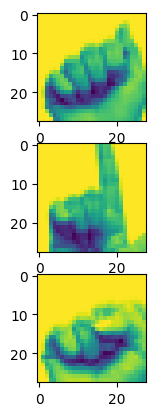

In [ ]:
TransForm = ToTensor()
Im = ImageOps.grayscale(Image.open('./p1.jpg'))
Im2 = ImageOps.grayscale(Image.open('./p2.jpg'))
Im3 = ImageOps.grayscale(Image.open('./p3.jpg'))
Im = Im.crop((10,50,250,300))
Im2 = Im2.crop((10,50,270,300))
Im3 = Im3.crop((10,50,270,300))
Pic1 = Im.resize((28,28))
Pic2 = Im2.resize((28,28))
Pic3 = Im3.resize((28,28))

Data_Pic_1 = np.array(Pic1.getdata()).reshape(28,28)
Data_Pic_2 = np.array(Pic2.getdata()).reshape(28,28)
Data_Pic_3 = np.array(Pic3.getdata()).reshape(28,28)

fig,(ax1,ax2,ax3) = plt.subplots(3,1)
ax1.imshow(Data_Pic_1)
ax2.imshow(Data_Pic_2)
ax3.imshow(Data_Pic_3)


In [ ]:
X1, X2, X3 = torch.Tensor(Data_Pic_1.reshape(1,28*28)),torch.Tensor(Data_Pic_2.reshape(1,28*28)),torch.Tensor(Data_Pic_3.reshape(1,28*28))

Pred1 = Model2(X1)
Pred2 = Model2(X2)
Pred3 = Model2(X3)

Label1 = Pred1.argmax(1)
Label2 = Pred2.argmax(1)
Label3 = Pred3.argmax(1)

print(f"Predicted Labels are {Label1}, {Label2}, {Label3}.")

Predicted Labels are tensor([6]), tensor([16]), tensor([6]).
